In [15]:
# Libraries
import awscam
import cv2

ret,frame = awscam.getLastFrame()
print(frame.shape)

(1520, 2688, 3)


The shape of the image is showing three numbers (1520, 2688, 3). In openCV, the positive x-axis (2688) is pointing east and the positive y-axis (2688) is pointing south. 3 is the number of channel which is BGR. 

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


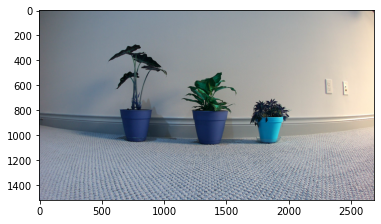

In [16]:
# Import the necessary dependencies
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(frame)
plt.show()

In [17]:
# MXnet libraries 
import time
import mxnet as mx
from gluoncv import model_zoo, data, utils


In [18]:
# Load a pretrained model

potted_plant_detector = model_zoo.get_model('yolo3_darknet53_coco',
                                            pretrained=True)
# narrow the detection criteria to potted plant
potted_plant_detector.reset_class(["potted plant"], 
                                  reuse_weights=["potted plant"]) 

In [19]:
# Pre-process the image

img = mx.nd.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
x, img = data.transforms.presets.ssd.transform_test(img, short=512)
class_IDs, scores, bounding_boxs = potted_plant_detector(x)

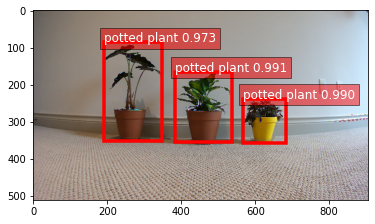

In [20]:
# Display result

class_IDs, scores, bounding_boxs = potted_plant_detector(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0],
                         class_names=potted_plant_detector.classes)

plt.show(ax)


In [21]:
# Saving the image

cv2.imwrite('output.jpg', frame)

True